# Overview

1. [Introduction to GeoPandas](#1)
2. [Datetime in pandas](#2)


# Introduction to GeoPandas<a class="anchor" id=1></a>

GeoPandas is a python library for geospatial data in pandas DataFrames. 

    import pandas as pd
    import geopandas as gdp
    
    df  = pd.DataFrame()
    gdf = gpd.GeoDataFrame()

A GeoDataFrame can be regarded as a DataFrame plus an extra column: a GeoSeries.
GeoSeries can contain the following geometries
 
    POINTS, MULTIPOINTS     # e.g. for an address
    LINES, MULTILINES       # e.g. for a street
    POLYGONS, MULTIPOLYGONS # e.g. for city boarders
    
Additionally, the GeoSeries has an attribute for the [Coordinate Reference System](https://en.wikibooks.org/wiki/Coordinate_Reference_Systems_and_Positioning) (Mercator projection etc.), `GeoSeries.crs`. For instance `crs="EPSG:4326"` references the World Geodetic System (WGS84) which is the typical projection used for GPS data. 

There can actually be more than one GeoSeries columns within a GeoDataFrame, but always only one `geometry` is active at a time.

Geometries of geographical data are typically stored in shape files, e.g. with ending .shp. The shape file only contains the GPS-data itself, and must be accompannied by other files with ending .shx (e.g. city names corresponding to shapes), .prj with the projection, and others. Another common file type is GeoJSON, which contains all the information in *one* file.
    
See also: [geopandas User Guide](https://geopandas.org/en/stable/docs/user_guide/data_structures.html).


In [52]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt

## (Download and) load the shape of Spain
Downloaded from http://centrodedescargas.cnig.es/CentroDescargas/index.jsp > Mapas vectoriales y Bases Cartográficas y Topográficas:

    BCN500
    Description: Base Cartográfica Nacional a escala 1:500.000.
    SGR: ETRS89. Coordenadas geográficas longitud y latitud.
    Download entity: toda España y por capas temáticas.
    Format: shapefile (.shp)

In [46]:
# Load shape file into GeoDataFrame
spain = gpd.read_file("data/BCN500_0101S_LIMITE_ADM.shp", crs="EPSG:4326") 
spain

,ID,ID_CODIGO,ID_TTOPO,FECHA_ALTA,TIPO_0101,CCAA,ETIQUETA,geometry
0,66,0101S,None,20150803093226,05,SAHARA OCCIDENTAL,Berzosilla,"POLYGON Z ((-4.00309 42.76336 0.00000, -4.0075..."
1,5,0101S,None,20100924000000,01,SAHARA OCCIDENTAL,SAHARA OCCIDENTAL,"POLYGON Z ((-13.17496 27.66696 0.00000, -13.16..."
2,6,0101S,None,20100924000000,01,ALGERIA,ALGERIA,"POLYGON Z ((-2.20538 35.08055 0.00000, -2.1993..."
3,11,0101S,None,20100924000000,03,Comunidad Valenciana,Castellón,"MULTIPOLYGON Z (((0.67795 39.84895 0.00000, 0...."
4,14,0101S,None,20100924000000,03,Andalucía,Almería,"MULTIPOLYGON Z (((-3.03654 35.93640 0.00000, -..."
...,...,...,...,...,...,...,...,...
61,124,0101S,None,20100924000000,01,PORTUGAL,PORTUGAL,"MULTIPOLYGON Z (((-7.96734 36.98903 0.00000, -..."
62,129,0101S,None,20100924000000,03,Región de Murcia,Murcia,"MULTIPOLYGON Z (((-0.70834 37.72544 0.00000, -..."
63,131,0101S,None,20150127000000,03,Castilla León,Palencia,"POLYGON Z ((-4.00308 42.76341 0.00000, -4.0092..."
64,7,0101S,None,20150303120334,01,MAURITANIA,MAURITANIA,"POLYGON Z ((-8.66679 27.29046 0.00000, -6.4471..."


In [47]:
# Filter countries out, with boolean filtering, just as you would do for pandas DataFrames
# CCAA is the abbreviation for Autonomous region in Spain
spain = spain[~spain["CCAA"].isin(["SAHARA OCCIDENTAL", "ALGERIA", "PORTUGAL", 'MARRUECOS', 'MAURITANIA','FRANCIA', 'ANDORRA'])]
spain

,ID,ID_CODIGO,ID_TTOPO,FECHA_ALTA,TIPO_0101,CCAA,ETIQUETA,geometry
3,11,0101S,None,20100924000000,03,Comunidad Valenciana,Castellón,"MULTIPOLYGON Z (((0.67795 39.84895 0.00000, 0...."
4,14,0101S,None,20100924000000,03,Andalucía,Almería,"MULTIPOLYGON Z (((-3.03654 35.93640 0.00000, -..."
6,10,0101S,None,20150601085812,03,Ciudad Autónoma de Melilla,Islas Chafarinas,"MULTIPOLYGON Z (((-2.43668 35.17210 0.00000, -..."
7,8,0101S,None,20150601085933,01,Ciudad Autónoma de Melilla,Peñón de Alhucemas,"POLYGON Z ((-3.88883 35.21270 0.00000, -3.8884..."
8,1,0101S,None,20150601103430,03,CEUTA,Isla de Peregil,"POLYGON Z ((-5.42019 35.90979 0.00000, -5.4205..."
9,2,0101S,None,20150601103430,03,CEUTA,Ceuta,"POLYGON Z ((-5.38447 35.91064 0.00000, -5.3832..."
10,9,0101S,None,20150601103433,01,Melilla,Peñón de Vélez de la Gomera,"POLYGON Z ((-4.29722 35.16967 0.00000, -4.2972..."
11,15,0101S,None,20100924000000,03,Comunidad Valenciana,Alicante,"MULTIPOLYGON Z (((-0.47068 38.16227 0.00000, -..."
12,16,0101S,None,20100924000000,03,Andalucía,Cádiz,"MULTIPOLYGON Z (((-6.31719 36.52711 0.00000, -..."
13,18,0101S,None,20100924000000,03,País Vasco,Alava,"POLYGON Z ((-3.14173 43.16151 0.00000, -3.1398..."


<AxesSubplot:>

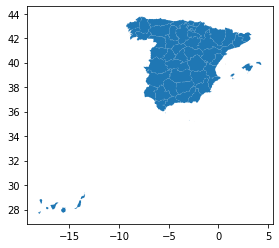

In [48]:
# plot spain
spain.plot()

<Axes:label='inset_axes'>

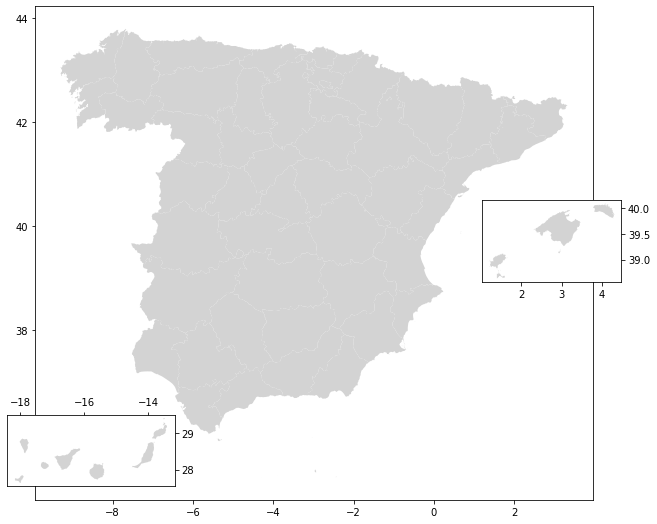

In [49]:
# separate balears and canary islands, to plot them independently
spain_main_land = spain[~spain["CCAA"].isin(['Illes Balears', 'Canarias'])]
spain_canarias  = spain[spain["CCAA"].isin(['Canarias'])]
spain_baleares  = spain[spain["CCAA"].isin(['Illes Balears'])]

# create canvas where balears and canary islands are plotted independently
f, ax = plt.subplots(figsize=(10,10))
axin1 = ax.inset_axes([-0.05, -0.05, 0.3, 0.3])
axin1.xaxis.tick_top()
axin1.yaxis.tick_right()

axin2 = ax.inset_axes([0.8, 0.4, 0.25, 0.25])
axin2.yaxis.tick_right()

spain_main_land.plot(ax=ax, color="lightgray")
spain_canarias.plot(ax = axin1, color="lightgray")
spain_baleares.plot(ax = axin2, color="lightgray")

### Writing files

Just as you can load geodata with read_file, you can save geodata to files with to_file

In [51]:
# in one geojson
spain_baleares.to_file("spain_baleares_gj.geojson", driver="GeoJSON")

# in several files including a shp file
spain_baleares.to_file("spain_baleares.shp")

/home/phrency/.local/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/phrency/.local/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


# Datetime in Pandas<a class="anchor" id=2></a>

In [101]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("analisi.transparenciacatalunya.cat", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(analisi.transparenciacatalunya.cat,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("pvrz-iijx", limit=10000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [102]:
# drop datetimes that are nans
results_df = results_df[results_df.data_naixement_infant.notna()]
results_df

,id_infant_jove,data_entrada_sistema,any_entrada_sistema,mes_entrada_sistema,servei_territorial_gestio,data_naixement_infant,sexe_infant,origen_infant
0,149187,2021-08-02T00:00:00.000,2021,08Agost,Girona,2004-01-01T00:00:00.000,Nois,Altra
1,160290,2022-06-17T00:00:00.000,2022,06Juny,Àrea Metropolitana BCN,2004-09-19T00:00:00.000,Nois,Marroc
2,152491,2021-11-15T00:00:00.000,2021,11Novembre,Terres de l'Ebre,2004-08-31T00:00:00.000,Nois,Magreb (excloent Marroc)
3,150851,2021-09-30T00:00:00.000,2021,09Setembre,Girona,2005-01-10T00:00:00.000,Nois,Magreb (excloent Marroc)
4,160526,2022-06-24T00:00:00.000,2022,06Juny,Àrea Metropolitana BCN,2005-05-17T00:00:00.000,Nois,Països Subsharians
...,...,...,...,...,...,...,...,...
9995,98561,2017-02-19T00:00:00.000,2017,02Febrer,Barcelona comarques,2000-05-14T00:00:00.000,Nois,Marroc
9996,115372,2018-07-04T00:00:00.000,2018,07Juliol,Lleida,2002-04-11T00:00:00.000,Nois,Magreb (excloent Marroc)
9997,118997,2018-10-03T00:00:00.000,2018,10Octubre,Girona,2003-04-08T00:00:00.000,Nois,Marroc
9998,106228,2017-10-09T00:00:00.000,2017,10Octubre,Barcelona ciutat,2001-07-08T00:00:00.000,Nois,Marroc


In [103]:
# add datetime column with python datetimes
results_df["data_naixement_infant_datetime"] = pd.to_datetime(results_df.data_naixement_infant)

In [104]:
results_df

,id_infant_jove,data_entrada_sistema,any_entrada_sistema,mes_entrada_sistema,servei_territorial_gestio,data_naixement_infant,sexe_infant,origen_infant,data_naixement_infant_datetime
0,149187,2021-08-02T00:00:00.000,2021,08Agost,Girona,2004-01-01T00:00:00.000,Nois,Altra,2004-01-01
1,160290,2022-06-17T00:00:00.000,2022,06Juny,Àrea Metropolitana BCN,2004-09-19T00:00:00.000,Nois,Marroc,2004-09-19
2,152491,2021-11-15T00:00:00.000,2021,11Novembre,Terres de l'Ebre,2004-08-31T00:00:00.000,Nois,Magreb (excloent Marroc),2004-08-31
3,150851,2021-09-30T00:00:00.000,2021,09Setembre,Girona,2005-01-10T00:00:00.000,Nois,Magreb (excloent Marroc),2005-01-10
4,160526,2022-06-24T00:00:00.000,2022,06Juny,Àrea Metropolitana BCN,2005-05-17T00:00:00.000,Nois,Països Subsharians,2005-05-17
...,...,...,...,...,...,...,...,...,...
9995,98561,2017-02-19T00:00:00.000,2017,02Febrer,Barcelona comarques,2000-05-14T00:00:00.000,Nois,Marroc,2000-05-14
9996,115372,2018-07-04T00:00:00.000,2018,07Juliol,Lleida,2002-04-11T00:00:00.000,Nois,Magreb (excloent Marroc),2002-04-11
9997,118997,2018-10-03T00:00:00.000,2018,10Octubre,Girona,2003-04-08T00:00:00.000,Nois,Marroc,2003-04-08
9998,106228,2017-10-09T00:00:00.000,2017,10Octubre,Barcelona ciutat,2001-07-08T00:00:00.000,Nois,Marroc,2001-07-08


### Time zones

In [105]:
from datetime import datetime
import pytz
datetime_in_Madrid = datetime.now(pytz.timezone('Europe/Madrid'))

### Filter for time ranges

In [112]:
start = datetime.strptime('01/01/2001', '%d/%m/%Y')
end   = datetime.strptime('01/01/2003', '%d/%m/%Y')


results_df_range =       results_df[results_df.data_naixement_infant_datetime      < end]
results_df_range = results_df_range[results_df_range.data_naixement_infant_datetime>=start]
results_df_range

,id_infant_jove,data_entrada_sistema,any_entrada_sistema,mes_entrada_sistema,servei_territorial_gestio,data_naixement_infant,sexe_infant,origen_infant,data_naixement_infant_datetime
9,147132,2021-10-18T00:00:00.000,2021,10Octubre,Barcelona ciutat,2002-08-16T00:00:00.000,Nois,Marroc,2002-08-16
15,130998,2019-09-12T00:00:00.000,2019,09Setembre,Lleida,2002-08-22T00:00:00.000,Nois,No informada,2002-08-22
20,132518,2019-11-04T00:00:00.000,2019,11Novembre,Barcelona ciutat,2001-02-01T00:00:00.000,Nois,Marroc,2001-02-01
49,129704,2019-07-30T00:00:00.000,2019,07Juliol,Lleida,2002-07-24T00:00:00.000,Nois,No informada,2002-07-24
50,118015,2018-09-09T00:00:00.000,2018,09Setembre,Àrea Metropolitana BCN,2002-12-31T00:00:00.000,Nois,No informada,2002-12-31
...,...,...,...,...,...,...,...,...,...
9992,101792,2017-05-27T00:00:00.000,2017,05Maig,Tarragona,2001-12-31T00:00:00.000,Nois,Marroc,2001-12-31
9993,125845,2019-04-02T00:00:00.000,2019,04Abril,Girona,2001-12-04T00:00:00.000,Nois,Marroc,2001-12-04
9994,103012,2017-06-29T00:00:00.000,2017,06Juny,Barcelona ciutat,2002-05-13T00:00:00.000,Nois,Marroc,2002-05-13
9996,115372,2018-07-04T00:00:00.000,2018,07Juliol,Lleida,2002-04-11T00:00:00.000,Nois,Magreb (excloent Marroc),2002-04-11


In [107]:
results_df.set_index("data_naixement_infant_datetime").between_time("00:05", "00:10")

,id_infant_jove,data_entrada_sistema,any_entrada_sistema,mes_entrada_sistema,servei_territorial_gestio,data_naixement_infant,sexe_infant,origen_infant
data_naixement_infant_datetime,,,,,,,,


In [ ]:
from datetime import datetime
import pytz
datetime_in_Madrid = datetime.now(pytz.timezone('Europe/Madrid'))